In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Importing dataset

In [2]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
adult_data_set = pd.DataFrame(adult.data.features)
adult_data_set['income'] = adult.data.targets
adult_data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
adult_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
adult_data_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Number of columns and row in the dataset

In [9]:
adult_data_set.shape

(48842, 15)

Generate descriptive statistics of the dataset.

In [10]:
adult_data_set.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Identifying unique values 

In [11]:
# iterating over each column and checking for unique values
for column in adult_data_set.columns:
  unique_values = adult_data_set[column].unique()
  print(f"{column} unique values")
  print(unique_values)
  print('\n')

age unique values
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass unique values
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt unique values
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num unique values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation unique values
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-servi

Remove punctaution mark from income column

In [12]:
adult_data_set['income'] = adult_data_set['income'].str.replace('.', '')

Checking for "?" values

In [13]:
# axis=0, operation will be applied vertically, row-wise
adult_data_set.isin(["?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Removing ? from columns

In [14]:
for column in ['native-country','occupation','workclass']:
  # inplace =True, changes are applied to the dataframe without creating a new frame
  # .index,  accesses the index labels of the rows
  adult_data_set.drop(adult_data_set[adult_data_set[column] == '?'].index, inplace=True)
  print(adult_data_set[column].unique())

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv' nan]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' nan 'Never-worked']


Checking for null values and counting the number of null values

In [15]:
adult_data_set.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Getting the mode of the columns which contains null values 

In [16]:
mode_value_of_workclass = adult_data_set['workclass'].mode()
mode_value_of_occupation = adult_data_set['occupation'].mode()
mode_value_of_native_countries = adult_data_set['native-country'].mode()
print()
print(mode_value_of_workclass)
print()
print(mode_value_of_occupation)
print()
print(mode_value_of_native_countries)
print()


0    Private
Name: workclass, dtype: object

0    Prof-specialty
Name: occupation, dtype: object

0    United-States
Name: native-country, dtype: object



Since there are significant amount of null values in the those columns, replacing them from their respective mode

In [17]:
# replacing all null values in workclass from private since it is the mode in workclasss
adult_data_set['workclass'].fillna('Private', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_11960\3033094980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['workclass'].fillna('Private', inplace=True)


In [18]:
# replacing all null values in occupation from Prof-specialty since it is the mode in occupation
adult_data_set['occupation'].fillna('Prof-specialty', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_11960\92794098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['occupation'].fillna('Prof-specialty', inplace=True)


In [19]:
# replacing all null values in native-country from United-States since it is the mode in native-country
adult_data_set['native-country'].fillna('United-States', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_11960\2448138822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['native-country'].fillna('United-States', inplace=True)


Duplication handling 

In [20]:
# Check for duplicate rows
duplicate_rows = adult_data_set.duplicated()

# Check if any duplicates exist
if duplicate_rows.any():
    print("The DataFrame contains duplicate rows.")
else:
    print("The DataFrame does not contain any duplicate rows.")

The DataFrame contains duplicate rows.


In [21]:
# Remove duplicate rows considering all columns
adult_data_set = adult_data_set.drop_duplicates()

# Check if any duplicates exist in the cleaned DataFrame
if adult_data_set.duplicated().any():
    print("The DataFrame still contains duplicate rows.")
else:
    print("The DataFrame does not contain any duplicate rows.")

The DataFrame does not contain any duplicate rows.


Plotting boxplots for each column against income

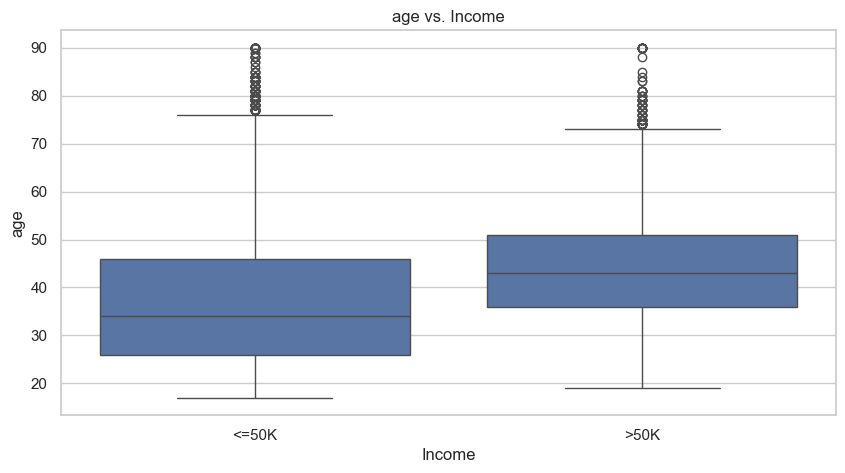

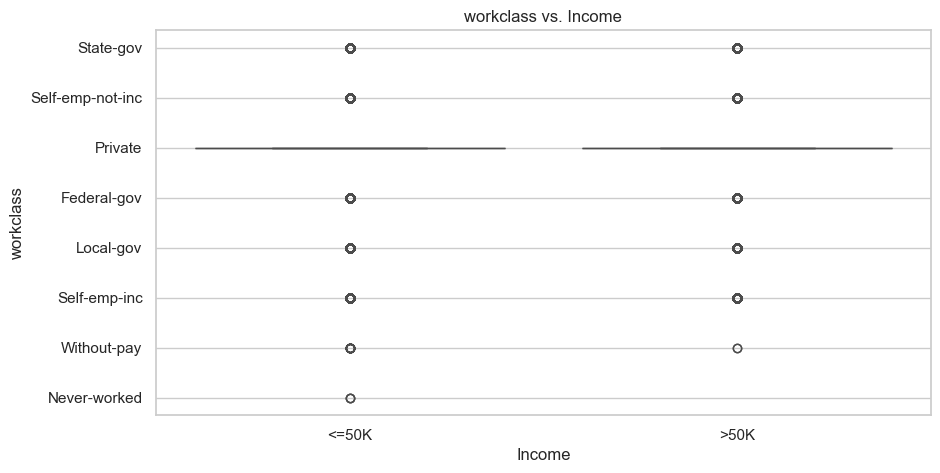

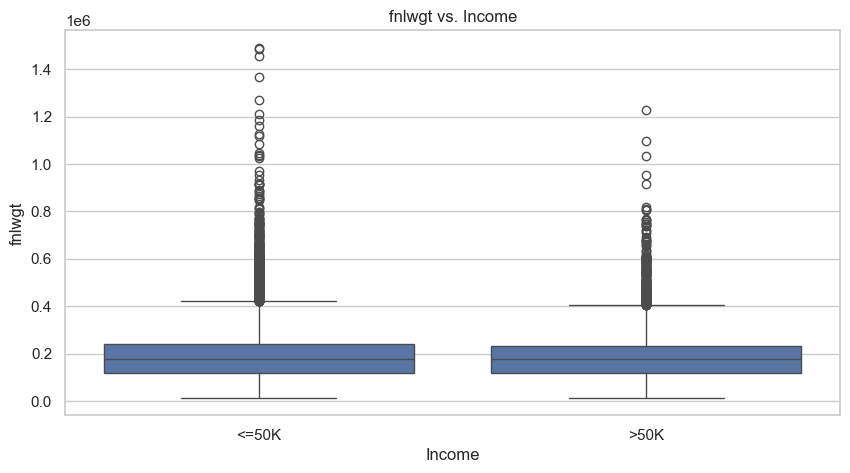

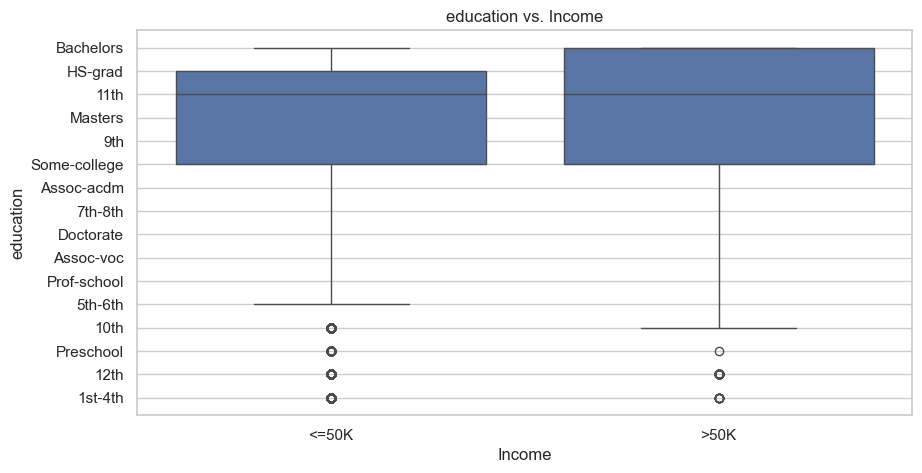

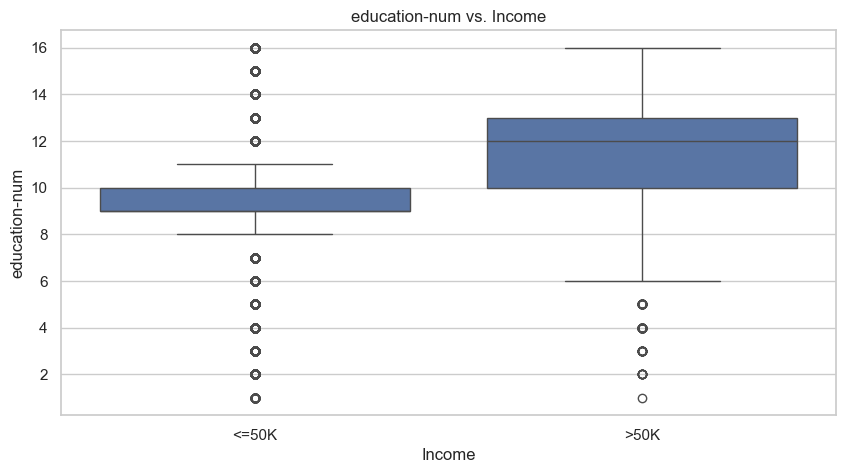

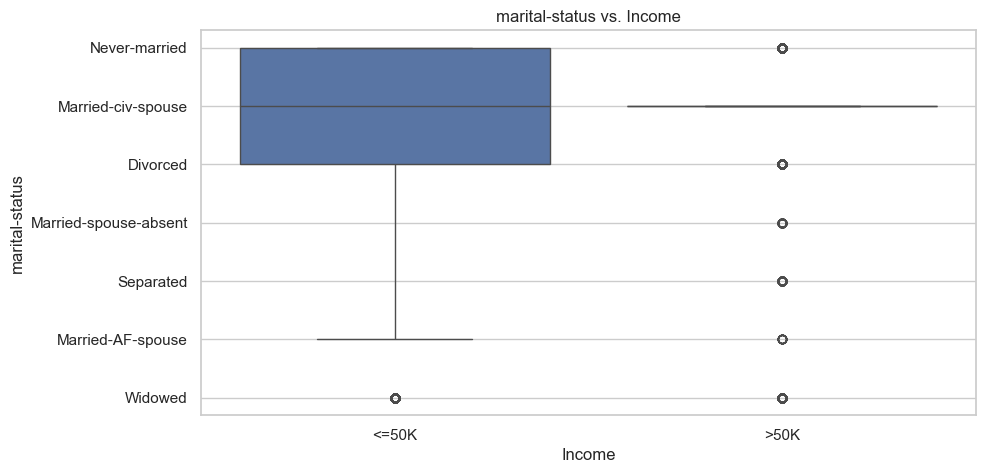

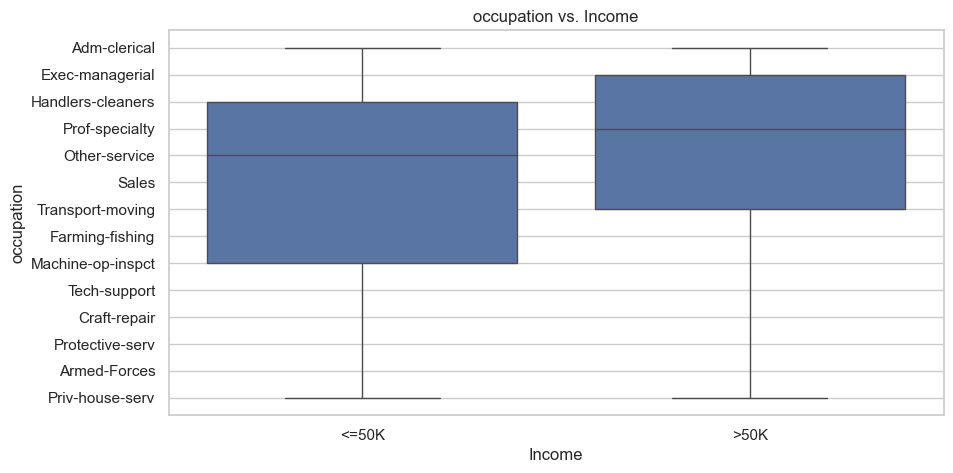

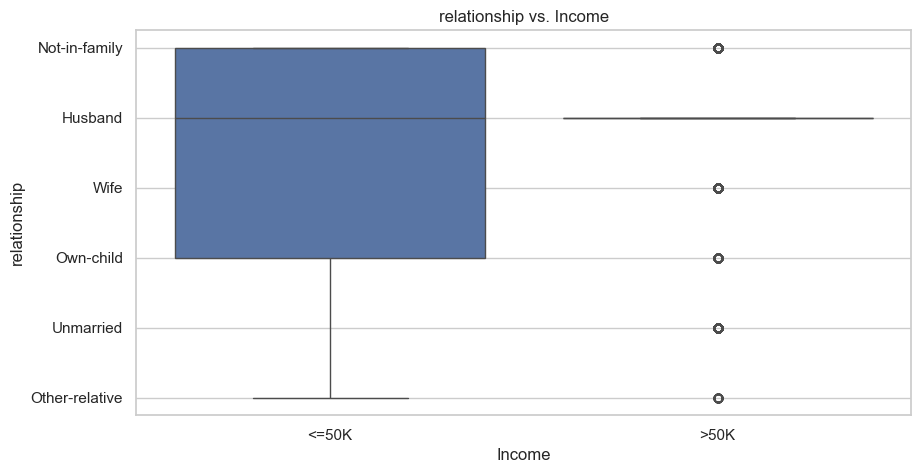

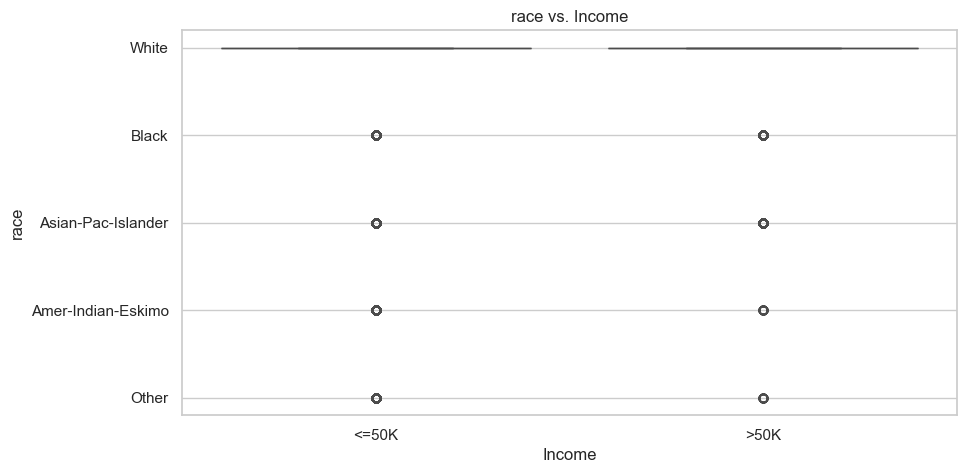

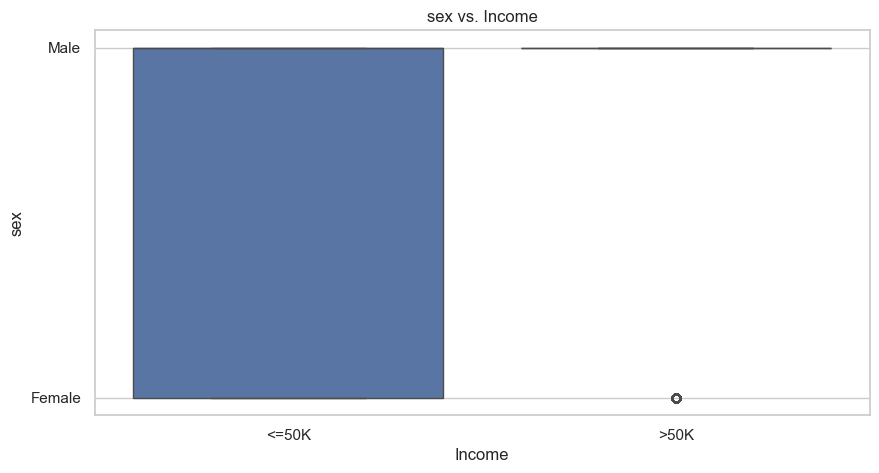

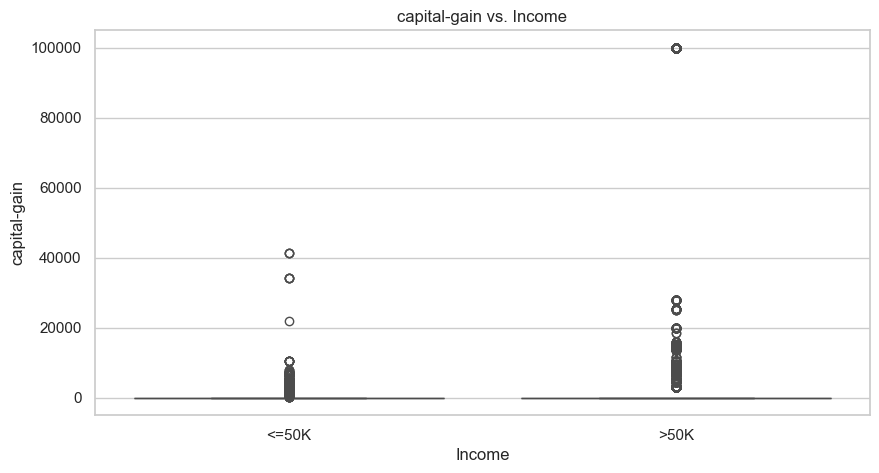

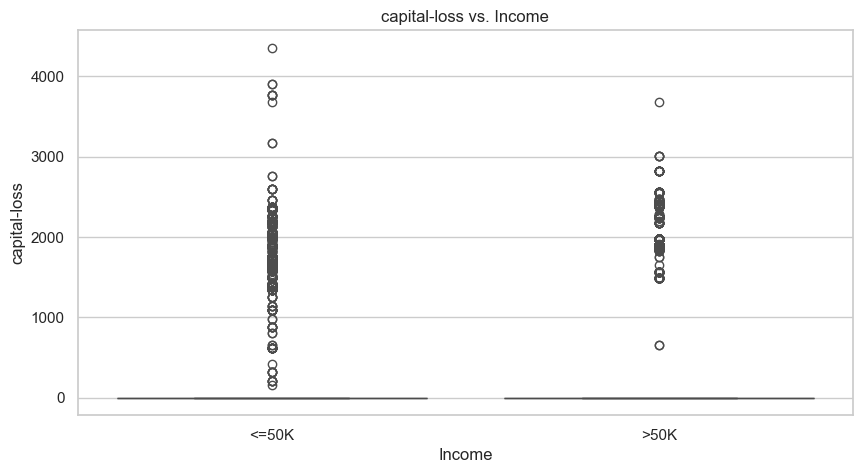

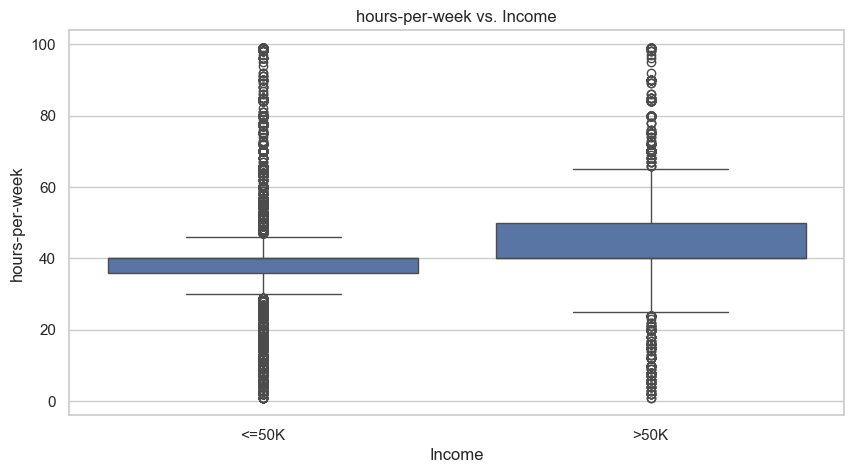

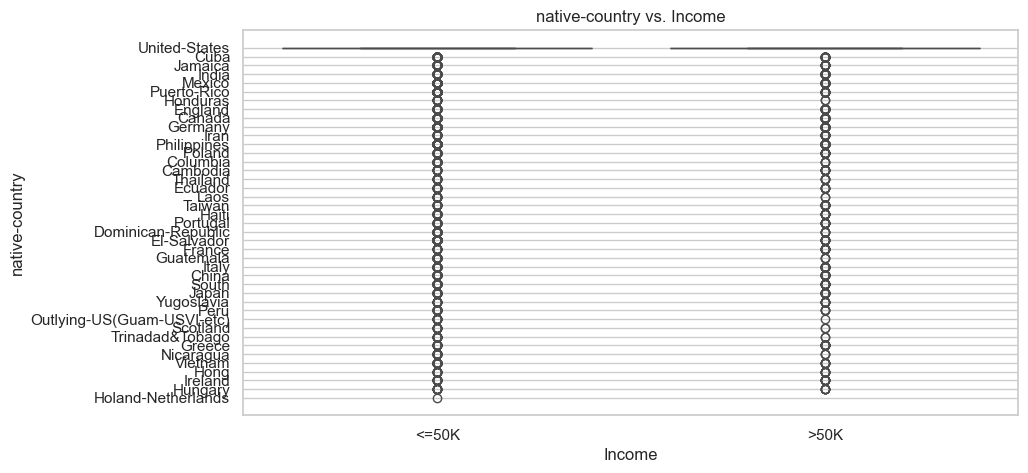

In [22]:
# Set the style of the seaborn plots
sb.set(style="whitegrid")

# Plot graphs for each column against the 'income' column
for column in adult_data_set.columns:
    if column != 'income':  # Exclude the 'income' column itself
        plt.figure(figsize=(10, 5))  # Set the size of the figure
        sb.boxplot(x='income', y=column, data=adult_data_set)
        plt.title(f'{column} vs. Income')
        plt.xlabel('Income')
        plt.ylabel(column)
        plt.show()

Plotting a heatmap to check the relationship between income and all other columns 

Applying Label Encoding and checking the relationship between income column and all other columns 

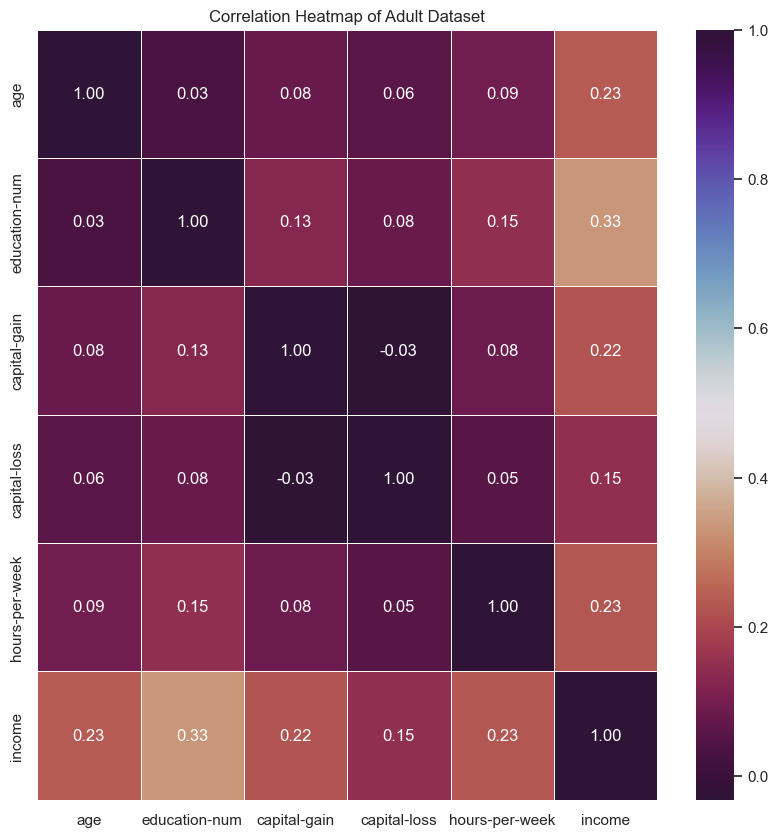

In [53]:
# Make a copy of the original DataFrame
data_label_encoded = adult_data_set.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'income' column
data_label_encoded['income'] = label_encoder.fit_transform(adult_data_set['income'])

# Select numeric columns from the adult_data_set
numeric_adult_data_set = adult_data_set.select_dtypes(include='number')

# Concatenate the 'income' column with the numeric_adult_data_set DataFrame
numeric_adult_data_set_with_income = pd.concat([numeric_adult_data_set, data_label_encoded['income']], axis=1)

# Calculate the correlation matrix
corrmat = numeric_adult_data_set_with_income.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(corrmat, annot=True, cmap='twilight_shifted_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Adult Dataset')
plt.show()

Droping the column fnlwgt, since it is irrelavant with income column 


In [24]:
adult_data_set.drop(columns=['fnlwgt'], inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_11960\1690225604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_data_set.drop(columns=['fnlwgt'], inplace=True)


Applying label encoding to train models

In [25]:
label_encoder = LabelEncoder()
adult_data_set_label_encoded = adult_data_set.copy()  # Make a copy of the original DataFrame
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

for col in columns_to_encode:
    adult_data_set_label_encoded[col] = label_encoder.fit_transform(adult_data_set[col])

# View the encoded DataFrame
adult_data_set_label_encoded

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,9,13,0,0,3,1,1,5455,0,40,38,0


Imbalance handling using random oversampling 

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state= 42)
X_resampled, y_resampled = ros.fit_resample(adult_data_set_label_encoded.drop(columns=['income']),adult_data_set_label_encoded['income'])
scaler = StandardScaler()
adult_data_set_balanced = scaler.fit_transform(X_resampled)

Random samples are generated in order to handle imbalance target column

In [27]:
# Convert the resampled data and target into a DataFrame
adult_df = pd.DataFrame(X_resampled, columns=adult_data_set_label_encoded.columns.drop('income'))
adult_df['income'] = y_resampled

# Calculate the sum of each class in the 'income' column
income_class_sum = adult_df['income'].value_counts()

print("Sum of income column classes:")
print(income_class_sum)

Sum of income column classes:
income
0    35047
1    35047
Name: count, dtype: int64


Split the data among training and testing sets

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(adult_data_set_balanced, y_resampled, test_size = 0.3, random_state = 42)

### Naïve Bayes classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6964667839650007


Evaluating model perforance 

In [38]:
#Checking the Accuracy 
from sklearn.metrics import accuracy_score 
ac = accuracy_score(y_test, y_pred) 
print("Accuracy: ", ac) 

# Precision score 
# Measures the proportion of true positive prediction among all positive predictions made by the model, this fouces on the accuracy of positive predictions
from sklearn.metrics import precision_score 
precision = precision_score(y_test, y_pred) 
print("Precision score: ", precision) 

# Recall score 
# fouces on the ability of the model to identify positive instances 
from sklearn.metrics import recall_score 
recall = recall_score(y_test, y_pred) 
print("Recall Score: ", recall)

# Checking the f1 score 
# provides a balance between precision and recall
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, y_pred) 
print("F1 Score: ",f1) 


F1 Score:  0.6012369588305116
Accuracy:  0.6964667839650007
Precision score:  0.8660907127429806
Recall Score:  0.46043440819060377


Checking over fitting scenarios in Naïve Bayes 

In [36]:
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = naive_bayes_classifier.predict(X_train)

# Calculate the accuracy of the model on the training dataset
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Make predictions on the testing dataset
y_test_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model on the testing dataset
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.6906960154896565
Testing Accuracy: 0.6964667839650007


### Random Forest classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)
# n_estimators specifies the number of decision tress that will be create in the random forest, increasing the number trees will increase the accracy of the prediction
# random state ensure results are reproducible 
random_forest_model = RandomForestClassifier(n_estimators=100, random_state= 42)

# Train the classifier using the training data
random_forest_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = random_forest_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9045128156355509


Finding best possible parameters for random forest classifier 

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': randint(10, 1000),  # Number of trees in the forest
    'max_depth': randint(5, 50),         # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a Leaf node
    'max_features': ['auto', 'sqrt', 'log2', None], # Number of features to consider when looking for the best split
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}
# {'bootstrap': False, 'max_depth': 34, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 469}
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = random_forest_model, 
                                   param_distributions = param_grid, 
                                   n_iter = 50, 
                                   cv = 5, 
                                   verbose = 2, 
                                   random_state = 42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_rf_model.score(X_test, y_test) 
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=33, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=710; total time=  23.5s
[CV] END bootstrap=True, max_depth=33, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=710; total time=  18.7s
[CV] END bootstrap=True, max_depth=33, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=710; total time=  14.2s
[CV] END bootstrap=True, max_depth=33, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=710; total time=  20.3s
[CV] END bootstrap=True, max_depth=33, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=710; total time=  21.8s
[CV] END bootstrap=True, max_depth=43, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=468; total time=  14.2s
[CV] END bootstrap=True, max_depth=43, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=4

c:\Users\deela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\deela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\deela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\deela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Best Parameters:  {'bootstrap': False, 'max_depth': 34, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 469}
Test Accuracy: 0.8938608588140188


In [58]:
best_rf_model.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = best_rf_model.predict(X_train)

# Calculate the accuracy of the model on the training dataset
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Make predictions on the testing dataset
y_test_pred = best_rf_model.predict(X_test)

# Calculate the accuracy of the model on the testing dataset
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.9534698868847448
Testing Accuracy: 0.8938608588140188


Evaluating model perforance 

In [65]:
#Checking the Accuracy 
from sklearn.metrics import accuracy_score 
ac = accuracy_score(y_test, y_test_pred) 
print("Accuracy: ", ac) 

# Precision score 
# Measures the proportion of true positive prediction among all positive predictions made by the model, this fouces on the accuracy of positive predictions
from sklearn.metrics import precision_score 
precision = precision_score(y_test, y_test_pred) 
print("Precision score: ", precision) 

# Recall score 
# fouces on the ability of the model to identify positive instances 
from sklearn.metrics import recall_score 
recall = recall_score(y_test, y_test_pred) 
print("Recall Score: ", recall)

# Checking the f1 score 
# provides a balance between precision and recall
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, y_test_pred) 
print("F1 Score: ",f1) 

Accuracy:  0.8938608588140188
Precision score:  0.862549625055139
Recall Score:  0.9355085637738015
F1 Score:  0.8975488846047921
